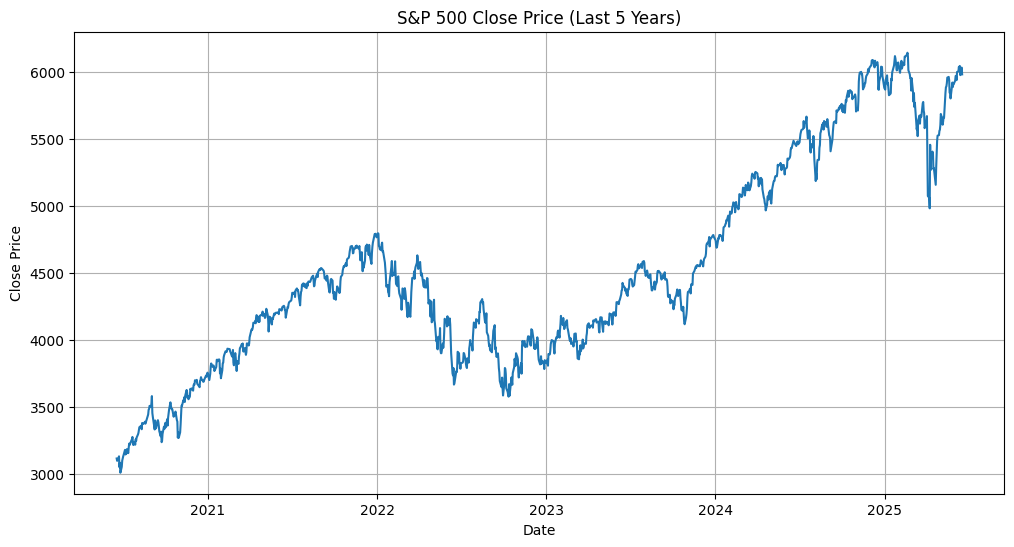

       Change  Percent Change
Year                         
2020   640.73       20.566937
2021  1065.53       28.793050
2022  -957.06      -19.953050
2023   945.69       24.729482
2024  1138.80       24.010981
2025   114.17        1.945455
In 2020, the S&P 500 increased by 640.73 points (20.57%).
In 2021, the S&P 500 increased by 1065.53 points (28.79%).
In 2022, the S&P 500 decreased by -957.06 points (-19.95%).
In 2023, the S&P 500 increased by 945.69 points (24.73%).
In 2024, the S&P 500 increased by 1138.80 points (24.01%).
In 2025, the S&P 500 increased by 114.17 points (1.95%).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('HistoricalData.csv')

df.columns = [col.replace(' ', '').replace('/', '_') for col in df.columns]

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')

last_date = df['Date'].max()
five_years_ago = last_date - pd.DateOffset(years=5)
df5 = df[df['Date'] >= five_years_ago]

plt.figure(figsize=(12,6))
plt.plot(df5['Date'], df5['Close_Last'])
plt.title('S&P 500 Close Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

df5['Year'] = df5['Date'].dt.year
yearly = df5.groupby('Year')['Close_Last'].agg(['first', 'last'])
yearly['Change'] = yearly['last'] - yearly['first']
yearly['Percent Change'] = (yearly['Change'] / yearly['first']) * 100

print(yearly[['Change', 'Percent Change']])

for year, row in yearly.iterrows():
    direction = "increased" if row['Change'] > 0 else "decreased"
    print(f"In {year}, the S&P 500 {direction} by {row['Change']:.2f} points ({row['Percent Change']:.2f}%).")